******OPEN DATAFRAME WITH POLARS******

In [1]:
#Parallelism
import polars as pl

#Import modules
import matplotlib.pyplot as plt
%matplotlib inline

#handling data
import pandas as pd
import numpy as np
import json
import networkx as nx
from datetime import datetime

import random

#Import libraries for sentiment classification
import pyarrow
from datasets import Dataset
from transformers import pipeline
from tqdm.auto import tqdm

In [2]:
#load data
data_sub=pl.read_ndjson(r'C:\Tempor\reddit\submissions\RS_2015-01')
data_com=pl.read_ndjson(r'C:\Tempor\reddit\comments\RC_2015-01')

# #show first rows
# data_sub.head()

# #show columns
# data_sub.columns

#select columns
df_sub=data_sub.select(["id","author","title","selftext","name","score","num_comments","subreddit","subreddit_id","from","from_id","created_utc"])
df_com=data_com.select(["id","author","body","name","parent_id","link_id","subreddit","subreddit_id","created_utc"])

# #expression to call columns
# df_pl['selftext']

#Dataframe length
print('la lunghezza del dataframe di submissions iniziale è ' + str(len(df_sub)))
print('la lunghezza del dataframe di comments iniziale è ' + str(len(df_com)))

la lunghezza del dataframe di submissions iniziale è 5465910
la lunghezza del dataframe di comments iniziale è 53851542


******SUBREDDIT FILTER******

In [3]:
df_sub_wsb=df_sub.filter((df_sub['subreddit']=="wallstreetbets")|(df_sub['subreddit']=="finance")|
                         (df_sub['subreddit']=="investing")|(df_sub['subreddit']=="Frugal")|
                         (df_sub['subreddit']=="SecurityAnalysis")|(df_sub['subreddit']=="RobinHood")|
                         (df_sub['subreddit']=="InvestmentClub")|(df_sub['subreddit']=="Forex")|
                         (df_sub['subreddit']=="options")|(df_sub['subreddit']=="CryptoCurrency")|
                         (df_sub['subreddit']=="StockMarket")|(df_sub['subreddit']=="economy")|
                         (df_sub['subreddit']=="Economics")|(df_sub['subreddit']=="GlobalMarkets")|
                         (df_sub['subreddit']=="dividends")|(df_sub['subreddit']=="Daytrading")|
                         (df_sub['subreddit']=="algotrading")|(df_sub['subreddit']=="pennystocks")|
                         (df_sub['subreddit']=="ValueInvesting")|(df_sub['subreddit']=="Bogleheads")|
                         (df_sub['subreddit']=="RobinHoodPennyStocks")|(df_sub['subreddit']=="RealDayTrading")|
                         (df_sub['subreddit']=="investingforbeginners")|(df_sub['subreddit']=="business")|
                         (df_sub['subreddit']=="Flipping")|(df_sub['subreddit']=="Entrepreneur")|
                         (df_sub['subreddit']=="wallstreet")|(df_sub['subreddit']=="wallstreetdd")|
                         (df_sub['subreddit']=="MiddleClassFinance")|(df_sub['subreddit']=="beermoney")|
                         (df_sub['subreddit']=="DropShipping101")|(df_sub['subreddit']=="smallbusiness")|
                         (df_sub['subreddit']=="churning")|(df_sub['subreddit']=="giftcardexchange")|
                         (df_sub['subreddit']=="personalfinance")|(df_sub['subreddit']=="FinancialPlanning")|
                         (df_sub['subreddit']=="CRedit")|(df_sub['subreddit']=="povertyfinance")|
                         (df_sub['subreddit']=="financialindipendence")|(df_sub['subreddit']=="leanfire")|
                         (df_sub['subreddit']=="flatFIRE")|(df_sub['subreddit']=="StudentLoans"))
                         

df_com_wsb=df_com.filter((df_com['subreddit']=="wallstreetbets")|(df_com['subreddit']=="finance")|
                         (df_com['subreddit']=="investing")|(df_com['subreddit']=="Frugal")|
                         (df_com['subreddit']=="SecurityAnalysis")|(df_com['subreddit']=="RobinHood")|
                         (df_com['subreddit']=="InvestmentClub")|(df_com['subreddit']=="Forex")|
                         (df_com['subreddit']=="options")|(df_com['subreddit']=="CryptoCurrency")|
                         (df_com['subreddit']=="StockMarket")|(df_com['subreddit']=="economy")|
                         (df_com['subreddit']=="Economics")|(df_com['subreddit']=="GlobalMarkets")|
                         (df_com['subreddit']=="dividends")|(df_com['subreddit']=="Daytrading")|
                         (df_com['subreddit']=="algotrading")|(df_com['subreddit']=="pennystocks")|
                         (df_com['subreddit']=="ValueInvesting")|(df_com['subreddit']=="Bogleheads")|
                         (df_com['subreddit']=="RobinHoodPennyStocks")|(df_com['subreddit']=="RealDayTrading")|
                         (df_com['subreddit']=="investingforbeginners")|(df_com['subreddit']=="business")|
                         (df_com['subreddit']=="Flipping")|(df_com['subreddit']=="Entrepreneur")|
                         (df_com['subreddit']=="wallstreet")|(df_com['subreddit']=="wallstreetdd")|
                         (df_com['subreddit']=="MiddleClassFinance")|(df_com['subreddit']=="beermoney")|
                         (df_com['subreddit']=="DropShipping101")|(df_com['subreddit']=="smallbusiness")|
                         (df_com['subreddit']=="churning")|(df_com['subreddit']=="giftcardexchange")|
                         (df_com['subreddit']=="personalfinance")|(df_com['subreddit']=="FinancialPlanning")|
                         (df_com['subreddit']=="CRedit")|(df_com['subreddit']=="povertyfinance")|
                         (df_com['subreddit']=="financialindipendence")|(df_com['subreddit']=="leanfire")|
                         (df_com['subreddit']=="flatFIRE")|(df_com['subreddit']=="StudentLoans"))

In [ ]:
print('length of filtered submissions dataframe: ' + str(len(df_sub_wsb)))
print('length of filtered comments dataframe: ' + str(len(df_com_wsb)))

In [ ]:
# Save subreddit files

# df_sub_wsb.write_ndjson(r'C:\Tempor\Reddit\data_for_sentiment_classification\df_sub_finance_2015-01.json')
# df_com_wsb.write_ndjson(r'C:\Tempor\Reddit\data_for_sentiment_classification\df_com_finance_2015-01.json')

******COMPANIES FILTER******

In [ ]:
text=df_sub_wsb['selftext']
title=df_sub_wsb['title']

# #Apple
# A=np.array(text.str.contains('|'.join(['iphone','apple tv','apple ipad','apple id','apple mac','apple ipod',
#                                        'apple macbook','apple itunes','apple trailers','apple support','apple mini',
#                                        'macbook pro','apple ipod touch']), literal=False))
# #Apple Inc.(qui metto quelle doppie: apple store, apple stock, apple computer)
# C=np.array(text.str.contains('|'.join(['apple inc','apple history','apple inc, history','apple company','apple stock',
#                                        'apple inc. stock','apple jobs', 'apple, inc.','apple store','apple computer',
#                                        'steve jobs','apple information','apple mission statement','history of apple inc']), literal=False))


RES=np.array(text.str.contains('|'.join(['Apple','APPLE','AAPL','aapl',
                                         'Amazon','AMAZON','AMZN','amzn',
                                         'Google', 'GOOGLE','GOOG','goog'])) |
             title.str.contains('|'.join(['Apple','APPLE','AAPL','aapl',
                                         'Amazon','AMAZON','AMZN','amzn',
                                         'Google', 'GOOGLE','GOOG','goog'])) )
# RES=np.logical_or(A,C)
df_sub_wsb_apple=df_sub_wsb.filter(RES)
print('length of companies filtered submissions dataframe: ' + str(len(df_sub_wsb_apple)))

In [ ]:
# Keep only comments made by users who replied to submissions in df_sub_web_apple. NB:  df_sub_web_apple contains also posts related to
# amazona and google, but since the code was originally wrote only for apple we keep this name

authors=df_sub_wsb_apple['name'].to_list()
Bool_vector=np.array(df_com_wsb['link_id'].str.contains('|'.join(authors)))
df_com_wsb_apple=df_com_wsb.filter(Bool_vector)
print('length of companies filtered comments dataframe: ' + str(len(df_com_wsb_apple)))

In [ ]:
# data_pandas_prova=pl.read_csv(r'C:\Tempor\Reddit\Pos_Neg\df_pandas.csv')
# data_pandas_prova=data_pandas_prova.filter(data_pandas_prova['text']!='[deleted]')

In [4]:
# text=data_pandas_prova['text']
# x=np.array(text.str.contains('|'.join(['Apple','APPLE','AAPL','aapl'])) )
# y=np.array(text.str.contains('|'.join(['Amazon','AMAZON','AMZN','amzn'])) )
# z=np.array(text.str.contains('|'.join(['Google', 'GOOGLE','GOOG','goog'])) )

# df_sub_wsb_apple=data_pandas_prova.filter(x)
# df_sub_wsb_amazon=data_pandas_prova.filter(y)
# df_sub_wsb_google=data_pandas_prova.filter(z)
# print('la lunghezza del dataframe di submissions di apple filtrato è ' + str(len(df_sub_wsb_apple)))
# print('la lunghezza del dataframe di submissions di amazon filtrato è ' + str(len(df_sub_wsb_amazon)))
# print('la lunghezza del dataframe di submissions di google filtrato è ' + str(len(df_sub_wsb_google)))

******SENTIMENT CLASSIFICATION******

In [ ]:
# Let's focus on texts

df_sub_nodes=df_sub_wsb_apple.select(["selftext","title"])
df_com_nodes=df_com_wsb_apple.select(["body"])

In [ ]:
# Submissions contain both title and selftext. If there is no selftext to analize consider title

prova=[]
for i in range(len(df_sub_nodes)):
    if(df_sub_nodes['selftext'][i]==""):
        prova.append(df_sub_nodes['title'][i])
    else:
        prova.append(df_sub_nodes['selftext'][i])

df_sub_nodes=df_sub_nodes.with_columns(pl.Series(name="body", values=prova))
df_sub_nodes=df_sub_nodes.select(["body"])

# Convert the dataset to be ready for the classification
sub_dataset=Dataset(df_sub_nodes.to_arrow()).rename_column("body","text")
com_dataset=Dataset(df_com_nodes.to_arrow()).rename_column("body","text")

In [ ]:
# BART zero-shot classification
pipe=pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

In [ ]:
# Submissions

possibili=['Positive','Negative']
predictions=[]
probs=[]
for line in tqdm(sub_dataset):
    output=pipe(line['text'],possibili, multi_label=False)
    prediction=output['labels'][0]
    predictions.append(prediction)
    probs.append(output['scores'][0])
df_sub_pre_pandas=df_sub_nodes.with_columns(pl.Series(name="labels", values=predictions),
                                            pl.Series(name="prob", values=probs) ).rename({"body":"text"})

df_sub_pandas=df_sub_pre_pandas.to_pandas()
df_sub_pandas.to_csv(r'C:\Tempor\reddit\df_sub_pandas.csv')

  0%|          | 0/3984 [00:00<?, ?it/s]

In [ ]:
# Comments

possibili=['Positive','Negative']
predictions_com=[]
probs_com=[]
for line in tqdm(com_dataset):
    output=pipe(line['text'],possibili, multi_label=False)
    prediction=output['labels'][0]
    predictions_com.append(prediction)
    probs_com.append(output['scores'][0])
df_com_pre_pandas=df_com_nodes.with_columns(pl.Series(name="labels", values=predictions_com),
                                            pl.Series(name="prob", values=probs_com) ).rename({"body":"text"})

df_com_pandas=df_com_pre_pandas.to_pandas()
df_com_pandas.to_csv(r'C:\Tempor\reddit\df_com_pandas.csv')

In [27]:
df_pandas=pd.concat([df_sub_pandas,df_com_pandas])
df_pandas.to_csv(r'C:\Tempor\reddit\df_pandas.csv')
sentiment_data=pd.read_csv(r'C:\Tempor\reddit\Pos_Neg\df_pandas.csv')

In [5]:
sentiment_data.head()

,Unnamed: 0,text,labels,prob
0,0,"One of the ""secrets"" to successful positioning...",Positive,0.618226
1,1,Please comment before PMing. I have a couple ...,Negative,0.641091
2,2,I'm looking for 2x 25$ Amazon or Steam GCs or ...,Positive,0.637804
3,3,Looking for a Google Play Card 25 USA. Comment...,Positive,0.645432
4,4,[H]Amazon $5 Gift Card [W]90% Venmo,Positive,0.835574


Text(0.5, 1.0, 'Sentiment Data Distribution')

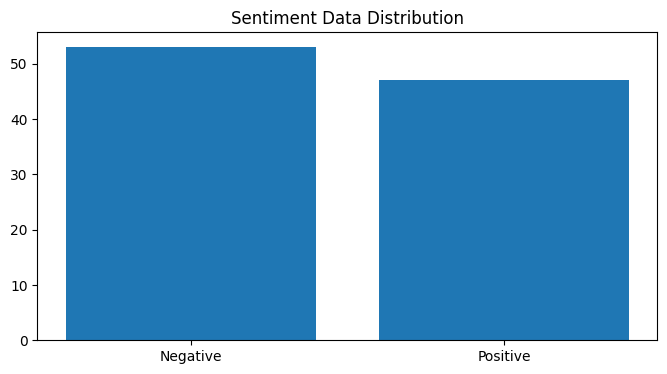

In [6]:
val_count = sentiment_data['labels'].value_counts()
percentage=val_count*100/len(sentiment_data)

plt.figure(figsize=(8,4))
plt.bar(val_count.index, percentage.values)
plt.title("Sentiment Data Distribution")